### import data

In [414]:
import pandas as pd
import urllib.request

# # load data from github
# data_url = 'https://raw.githubusercontent.com/ebauch/NV_data/master/T2star_survey.csv'
# data = urllib.request.urlopen(data_url)
# pd.read_csv(data, encoding='latin1', header=0)
# df

# if data is saved locally as csv uncomment lines below
file = 'T2star_survey.csv'
df = pd.read_csv(file, encoding='latin1', header=0)
df

,Defect,Host,Concentration (cm^-3),Interrogated Spins,T2* (us),FOM (us),Bath,Reference,Comment,Where to Find
0,NV-,Diamond,2.5E+12,2.5E+04,68,1.70E+06,"0.05 ppm N, 0.01% 13C",Bauch 2017,double quantum,NaN
1,NV-,Diamond,1E+15,1.0E+07,58,5.80E+08,"0.75 ppm N, 0.01% 13C",Bauch 2017,double quantum + spin bath driving,NaN
2,NV-,Diamond,1E+16,1.0E+07,5,5.00E+07,"10 ppm N, 0.05% 13C",Bauch 2017,double quantum + spin bath driving,NaN
3,NV-,Diamond,n/a,1.0E+11,0.2,2.00E+10,n/a,Kubo2011,NaN,"last page, bottom left"
4,NV-,Diamond,7E+17,5.3E+11,0.15,7.88E+10,"< 100 ppm N, 1.1 13C%",Acosta 2010,NaN,3rd paragraph
5,NV-,Diamond,2.8E+18,2.2E+08,0.1,2.18E+07,"< 100 ppm N, 1.1 13C%",Acosta 2009,NaN,abstract
6,SiV0,Diamond,ensemble,n/a,ask Natalie,n/a,1.1% 13C,Rose 2017,cryogenic temperatures,NaN
7,P,Silicon,1.00E+15,1.0E+15,1.8,1.80E+15,0.08% 29Si,Abe 2010,"cryogenic temperatures, EPR","Fig. 4b, note [19]"
8,PL5,Silicon Carbide,ensemble,n/a,2,n/a,"4.7% 29Si, 1.1% 13C",Zhou 2017,worked in strain basis to protect against magn...,NaN
9,PL6,Silicon Carbide,2.8E+18,1.0E+03,0.3,3.00E+02,"4.7% 29Si, 1.1% 13C (likely)",Klimov 2015,NaN,"abstract, supplement S4"


### make plots

In [417]:
# number of interrogated spins
x = pd.to_numeric(df.iloc[:,3], 'coerce').get_values()
# T2* in us
y1 = pd.to_numeric(df.iloc[:,4], 'coerce').get_values()
# FOM
y2 = pd.to_numeric(df.iloc[:,5], 'coerce').get_values()
# reference + remove spaces
labels = df.iloc[:,7]
labels = [label.replace(" ","") for label in labels]

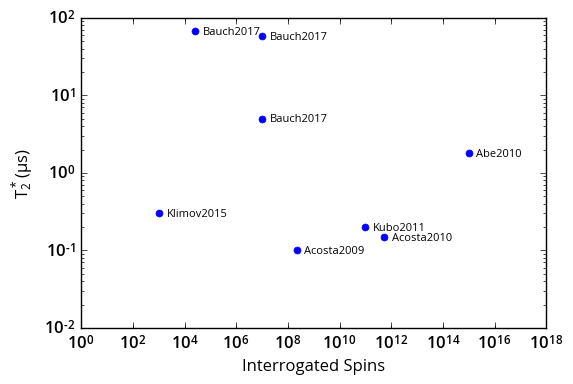

In [419]:
pick = [0, 1, 2, 3, 4, 5, 7, 9] # pick good data points

# plot data + labels
plt.plot(x[pick], y1[pick], 'b.', ms=10)
for i in pick:
    plt.text(x[i]*2, y1[i]*(0.99), labels[i], fontsize=8, fontweight='normal', va='center', ha='left')

# set plot labels

plt.xlabel('Interrogated Spins')
plt.ylabel(r'$T_2^* (\mu$s)')

plt.xscale('log')
plt.yscale('log')

plt.xlim([10**0, 10**18])
plt.ylim([10**-2, 100])

plt.savefig("fig.pdf")

plt.show()

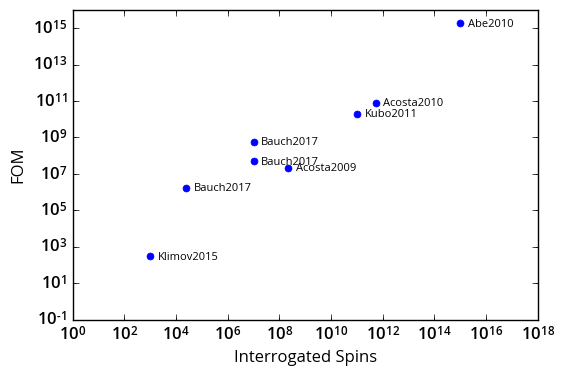

In [420]:
# generate FOM plot

# plot data + labels
plt.plot(x[pick], y2[pick], 'b.', ms=10)
for i in pick:
    plt.text(x[i]*2, y2[i] * 0.9, labels[i], fontsize=8, fontweight='normal', va='center', ha='left')

# set plot labels
plt.xlabel('Interrogated Spins')
plt.ylabel(r'FOM')

plt.xscale('log')
plt.yscale('log')

plt.xlim([10**0, 10**18])
plt.ylim([10**-1, 10**16])

plt.savefig("fig2.pdf")

plt.show()

# references + spin concentrations where available

In [412]:
um3 = 10**-12 # qubic micron in qubic cm

Abe, E., Tyryshkin, A. M., Tojo, S., Morton, J. J. L., Witzel, W. M., Fujimoto, A., … Itoh, K. M. (2010). Electron spin coherence of phosphorus donors in silicon: Effect of environmental nuclei. Physical Review B - Condensed Matter and Materials Physics, 82(12), 9–12. 

Acosta, V. M., Bauch, E., Jarmola, A., Zipp, L. J., Ledbetter, M. P., & Budker, D. (2010). Broadband magnetometry by infrared-absorption detection of nitrogen-vacancy ensembles in diamond. Applied Physics Letters, 97(17). http://doi.org/10.1063/1.3507884

In [245]:
detectionVol = 50 * 50 * 300 * um3
concentration = 7e17 # cm^-3
'%e' %  (detectionVol * concentration)

'5.250000e+11'

Acosta, V. M., Bauch, E., Ledbetter, M. P., Santori, C., Fu, K. M. C., Barclay, P. E., … Budker, D. (2009). Diamonds with a high density of nitrogen-vacancy centers for magnetometry applications. Physical Review B - Condensed Matter and Materials Physics, 80(11), 1–15. https://doi.org/10.1103/PhysRevB.80.115202

In [246]:
detectionVol = 0.5 * 0.5 * 300 * um3
concentration = 2.8e18 # cm^-3
'%e' %  (detectionVol * concentration)

'2.100000e+08'

Angerer, A., Perroy, R., & Careas, S. (2015). Subnanotesla quantum-interference magnetometry with a single spin in diamond. https://arxiv.org/abs/1509.01637

Christle, D., Falk, A., & Andrich, P. (2014). Isolated electron spins in silicon carbide with millisecond-coherence times. Nature Materials, 14(February), 160–163. https://doi.org/10.1038/NMAT4144

Becker, J. N., Görlitz, J., Arend, C., Markham, M., & Becher, C. (2016). Ultrafast, all-optical coherent control of single silicon vacancy colour centres in diamond, 2, 1–6. http://doi.org/10.1038/ncomms13512

Maurer, P. C., Kucsko, G., Latta, C., Jiang, L., Yao, N. Y., Bennett, S. D., … Lukin, M. D. (2012). Room-Temperature Quantum Bit Memory Exceeding One Second. Science, 336(6086), 1283–1286. https://doi.org/10.1126/science.1220513
    


Klimov, P. V, Falk, A. L., Christle, D. J., Dobrovitski, V. V, & Awschalom, D. D. (2015). Quantum entanglement at ambient conditions in a macroscopic solid-state spin ensemble. Sci. Adv., 1(1), 1–8. http://doi.org/10.1126/sciadv.1501015

Koehl, W. F., Buckley, B. B., Heremans, F. J., Calusine, G., & Awschalom, D. D. (2011). Room temperature coherent control of defect spin qubits in silicon carbide. Nature, 479(7371), 84–87. http://doi.org/10.1038/nature10562



Kubo, Y., Grezes, C., Dewes, A., Umeda, T., Isoya, J., Sumiya, H., … Bertet, P. (2011). Hybrid quantum circuit with a superconducting qubit coupled to a spin ensemble. Physical Review Letters, 107(22). http://doi.org/10.1103/PhysRevLett.107.220501

In [247]:
detectionVol = 40 * um3
spins = 10**3
concentraton = '%e' %  (spins * detectionVol)
concentration

2.8e+18

Zhou, Y., Wang, J., Zhang, X., Li, K., Cai, J., & Gao, W. (2017). Self-protected nanoscale thermometry based on spin defects in silicon carbide, (4), 1–7. Retrieved from http://arxiv.org/abs/1704.03301